# BeautifulSoup: Web Scraping: Members of Parliament
### Unpacking simple HTML document to extract the data we are interested in from a web page

### Webscraping MPs information:

In [95]:
## Using requests and Beautifull Soup:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import os

In [7]:
#By querying wikipedia's "list of" we can find all past and present MPs
url = "https://www.theyworkforyou.com/mps/"

page = requests.get(url)

In [92]:
#OUtput the data into the notebook
from IPython.core.display import display, HTML
#display(HTML(page.text))

In [9]:
#Pass the HTML string to beautifullsoup to convert into a structured object
#mps = BeautifulSoup(html_string.text)

mps = BeautifulSoup(page.content, 'html.parser')

In [88]:
#print(mps)

In [90]:
#Extract the html body
mps_body = mps.find(name = 'body')
#print(mps_body)

In [12]:
#From the htmp body, extract the H2 list of MPs
mps_list = mps_body.findAll(name = "h2") #, attrs ={"class":"people-list__person__name"})

In [87]:
mps_list[:5]

[<h2>All MPs</h2>,
 <h2 class="people-list__person__name">Diane Abbott</h2>,
 <h2 class="people-list__person__name">Debbie Abrahams</h2>,
 <h2 class="people-list__person__name">Nigel Adams</h2>,
 <h2 class="people-list__person__name">Bim Afolami</h2>]

In [91]:
# Now extract the data into a list
#Skip the title in the first line
#Skip the last 2 lines
mp_name = []

for row in mps_list[1:-2]:
    mp_name.append(row.text)
    #print(row.text)
mp_name[:10]

['Diane Abbott',
 'Debbie Abrahams',
 'Nigel Adams',
 'Bim Afolami',
 'Adam Afriyie',
 'Nickie Aiken',
 'Peter Aldous',
 'Rushanara Ali',
 'Tahir Ali',
 'Lucy Allan']

In [45]:
#From the htmp body,extract the party and constituencies
mps_part_const = mps_body.findAll(name = "span") #, attrs ={"class":"people-list__person__name"})
mps_part_const[:10]

[<span></span>,
 <span class="people-list__person__constituency">Hackney North and Stoke Newington</span>,
 <span class="people-list__person__party labour">Labour</span>,
 <span class="people-list__person__constituency">Oldham East and Saddleworth</span>,
 <span class="people-list__person__party labour">Labour</span>,
 <span class="people-list__person__constituency">Selby and Ainsty</span>,
 <span class="people-list__person__party conservative">Conservative</span>,
 <span class="people-list__person__constituency">Hitchin and Harpenden</span>,
 <span class="people-list__person__party conservative">Conservative</span>,
 <span class="people-list__person__constituency">Windsor</span>]

In [48]:
#Find the constituency
constituency = mps_body.findAll("span", class_=re.compile('people-list__person__constituency'))

mp_const = []

for row in constituency:
    mp_const.append(row.text)
mp_const[:10]

['Hackney North and Stoke Newington',
 'Oldham East and Saddleworth',
 'Selby and Ainsty',
 'Hitchin and Harpenden',
 'Windsor',
 'Cities of London and Westminster',
 'Waveney',
 'Bethnal Green and Bow',
 'Birmingham, Hall Green',
 'Telford']

In [49]:
#Find the party
party = mps_body.findAll("span", class_=re.compile('people-list__person__party'))

mp_party = []

for row in party:
    mp_party.append(row.text)
mp_party[:10]

['Labour',
 'Labour',
 'Conservative',
 'Conservative',
 'Conservative',
 'Conservative',
 'Conservative',
 'Labour',
 'Labour',
 'Conservative']

In [59]:
# Import data to a dataframe:
d = {'mp_name': mp_name, 'mp_consituency': mp_const, 'mp_party': mp_party}
df = pd.DataFrame(data=d)
df.head()

mp_name                     mp_consituency      mp_party
0     Diane Abbott  Hackney North and Stoke Newington        Labour
1  Debbie Abrahams        Oldham East and Saddleworth        Labour
2      Nigel Adams                   Selby and Ainsty  Conservative
3      Bim Afolami              Hitchin and Harpenden  Conservative
4     Adam Afriyie                            Windsor  Conservative

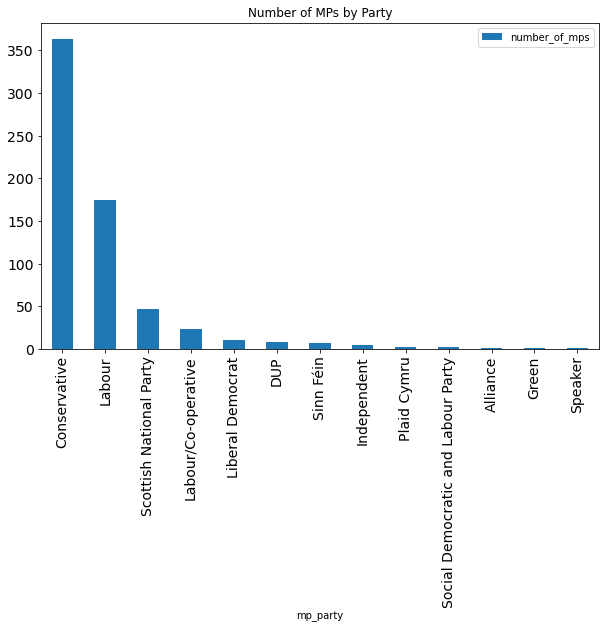

In [86]:
#Group data by party and count number of MPs
df_mps_by_party = df[["mp_party","mp_name"]].groupby(["mp_party"]).count()
#Sort the DF
df_mps_by_party.sort_values(by=["mp_name"], ascending = False, inplace=True)

#Rename the column in place
df_mps_by_party.rename(columns={"mp_name": "number_of_mps"},inplace=True)

df_mps_by_party.plot(kind="bar",figsize=[10,6],title="Number of MPs by Party",fontsize=14);

### Save the notebook and output to HTML

In [93]:
%%javascript
IPython.notebook.save_notebook()

<IPython.core.display.Javascript object>

In [99]:
#Output the notebook to html
output_folder = "'/mnt/c/Users/bmja4/person_projects/my-personal_project/flask/templates'"


filename =  "web_scraping_members_of_parliament"
jp_suffix = ".ipynb"
html_suffix = "html"
output_path = os.path.join(output_folder,target_filename)

!jupyter nbconvert --to html --no-input web_scraping_members_of_parliament.ipynb
!mv $f"flask/{filename}" $output_path

[NbConvertApp] Converting notebook web_scraping_members_of_parliament.ipynb to html
[NbConvertApp] Writing 315779 bytes to web_scraping_members_of_parliament.html
mv: missing destination file operand after 'flask/{filename}'
Try 'mv --help' for more information.
